# Séries temporais

In [1]:
!pip install pmdarima

                                              0.0/572.7 kB ? eta -:--:--
     ------------------------------------  563.2/572.7 kB 11.8 MB/s eta 0:00:01
     -------------------------------------- 572.7/572.7 kB 8.9 MB/s eta 0:00:00
                                              0.0/988.4 kB ? eta -:--:--
     ------------------------------------  983.0/988.4 kB 30.4 MB/s eta 0:00:01
     ------------------------------------- 988.4/988.4 kB 20.8 MB/s eta 0:00:00
                                              0.0/9.4 MB ? eta -:--:--
     ----                                     1.1/9.4 MB 23.5 MB/s eta 0:00:01
     ------                                   1.6/9.4 MB 16.8 MB/s eta 0:00:01
     -------                                  1.7/9.4 MB 13.5 MB/s eta 0:00:01
     ------------                             3.0/9.4 MB 15.9 MB/s eta 0:00:01
     -------------                            3.2/9.4 MB 14.6 MB/s eta 0:00:01
     ----------------                         4.0/9.4 MB 14.9 MB/s e

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.ar_model import AutoReg
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

## Carregar um exemplo de série temporal

Fonte da série: https://www.kaggle.com/census/population-time-series-data?select=POP.csv


Caso o dataset estiver na mesma localização deste arquivo no seu computador, opcionalmente você pode utilizar o seguinte comando para carregar os dados:

st = pd.read_csv("POP.csv")

In [3]:
st = pd.read_csv("https://raw.githubusercontent.com/jefferson-oliva/databases/master/POP.csv")

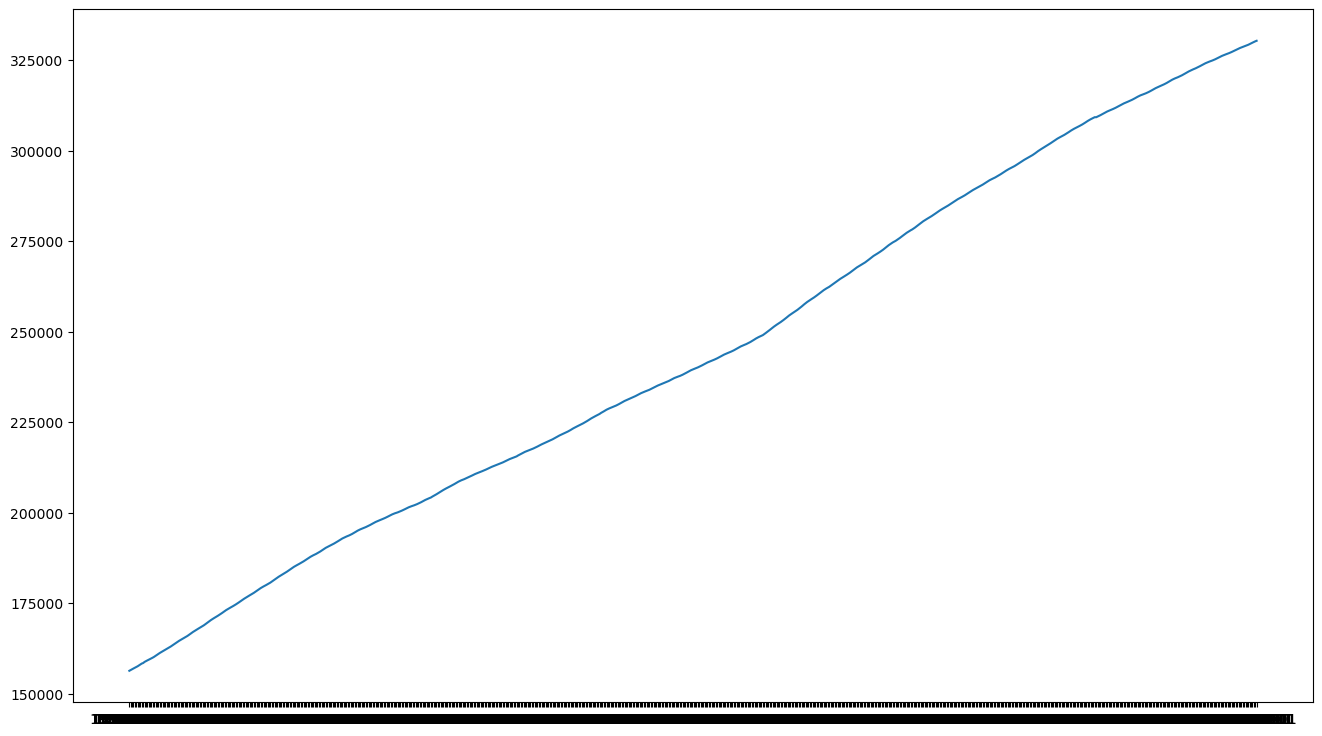

In [4]:
plt.figure(figsize=(16,9))
plt.plot(st['date'], st['value'])
plt.show()

### Obtenção da série temporal referente ao crescimento populacional

Para a redução dos valores das de avaliação, a série temporal pode ser preprocessada (por exemplo, dividir por 1000)

In [5]:
s1 = np.asarray(st['value'])

## Predição do crescimento populacional

### Vamos assumir que a série temporal $s1$ seja estacionária e vamos dividi-la em dois segmentos: um para treino e outro para teste

In [6]:
tam = int(0.9 * len(s1)) # o segmento terá 90% do tamanho da série
treino = s1[0 : tam] # segmento da série temporal em que será realizada a predição
teste = s1[tam : ] # segmento da série temporal em que serão realizadas comparações com os resultados da predição

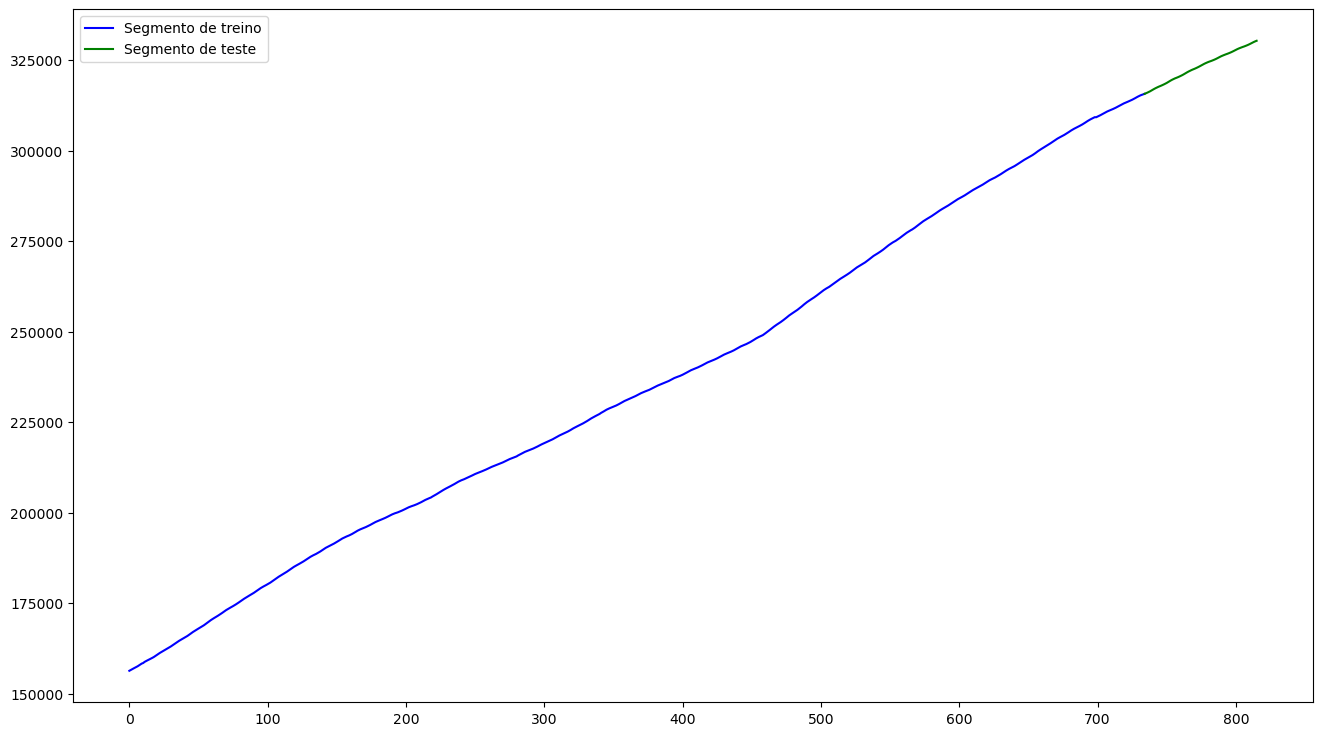

In [7]:
teste_x_axis = range(len(treino), len(s1))
plt.figure(figsize=(16,9))
plt.plot(s1[0 : tam + 1], color='blue')
plt.plot(teste_x_axis,teste, color='Green')
plt.legend(['Segmento de treino', 'Segmento de teste'])
plt.show()

### Modelos autorregressivo, médias móveis, ARMA e ARIMA

In [8]:
warnings.simplefilter('ignore', ConvergenceWarning)

# Como a série temporal possui componente de tendência linear, o parâmetro trend é configurado para 't'
mARMA = pm.ARIMA(order = (1, 0, 1), trend = 't').fit(treino)

D:\Workspace\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


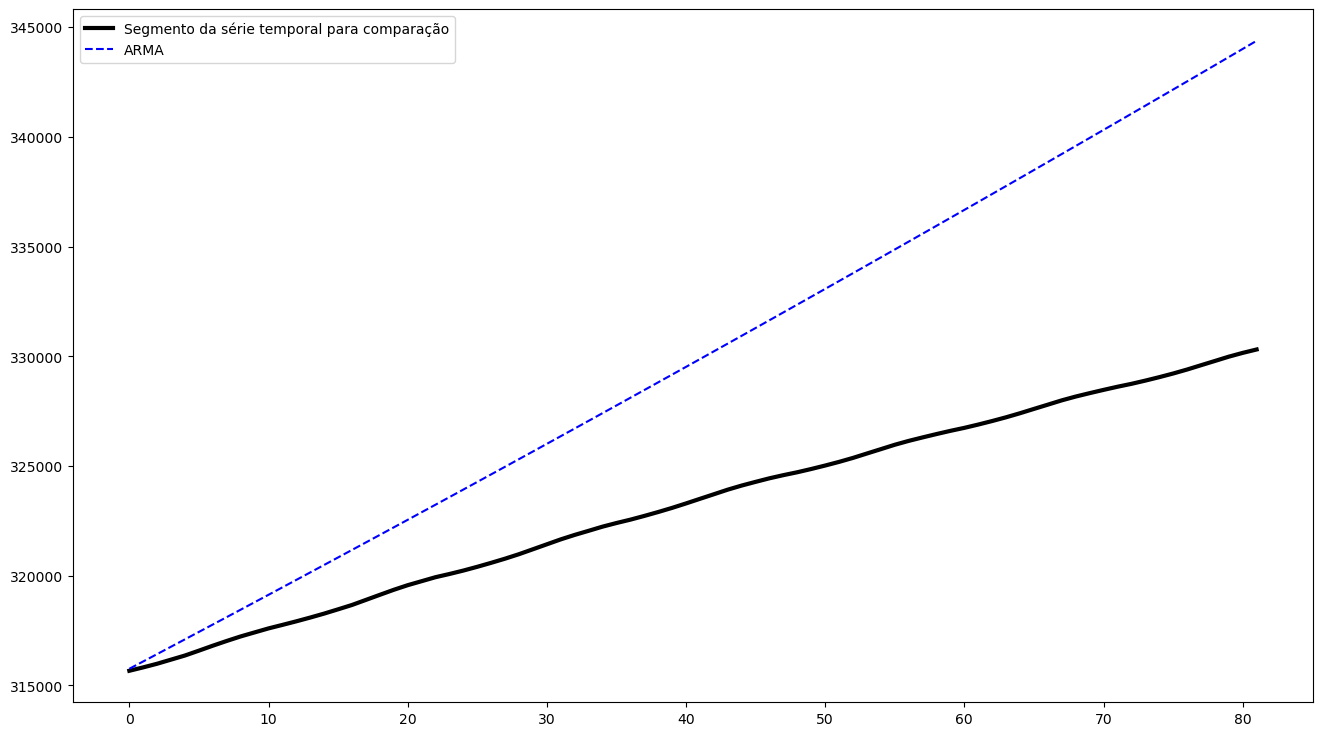

In [9]:
pred_ARMA = mARMA.predict(teste.shape[0])

plt.figure(figsize=(16,9))
plt.plot(teste, color='black', linewidth=3)
plt.plot(pred_ARMA, color='blue', linestyle='dashed')
plt.legend(['Segmento da série temporal para comparação', 'ARMA'])

#### Modelo AR utilizando o ARIMA

In [10]:
mAR = pm.ARIMA(order = (1, 0, 0), trend = 't').fit(treino)

D:\Workspace\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


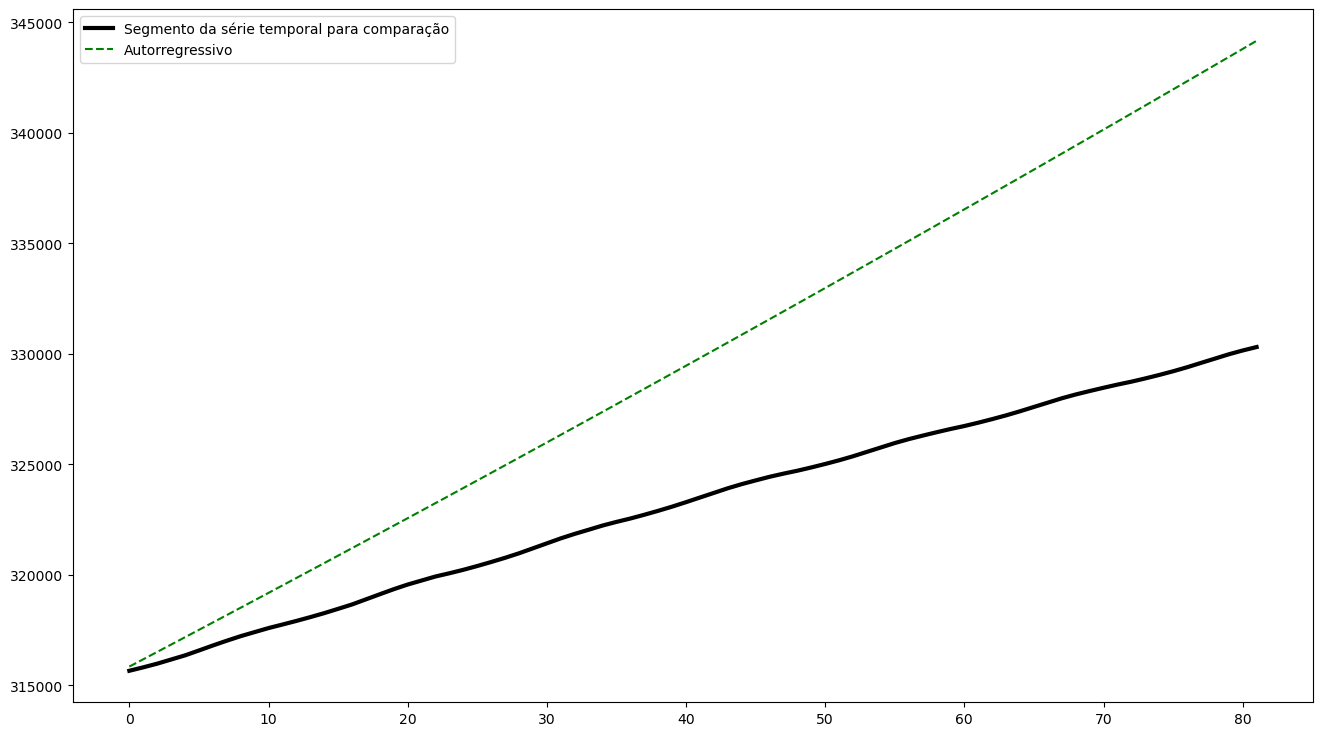

In [11]:
pred_AR = mAR.predict(teste.shape[0])

plt.figure(figsize=(16,9))
plt.plot(teste, color='black', linewidth=3)
plt.plot(pred_AR, color='green', linestyle='dashed')
plt.legend(['Segmento da série temporal para comparação', 'Autorregressivo'])

#### Modelo MM utilizando ARIMA

In [12]:
mMM = pm.ARIMA(order = (0, 0, 1), trend = 't').fit(treino)

D:\Workspace\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


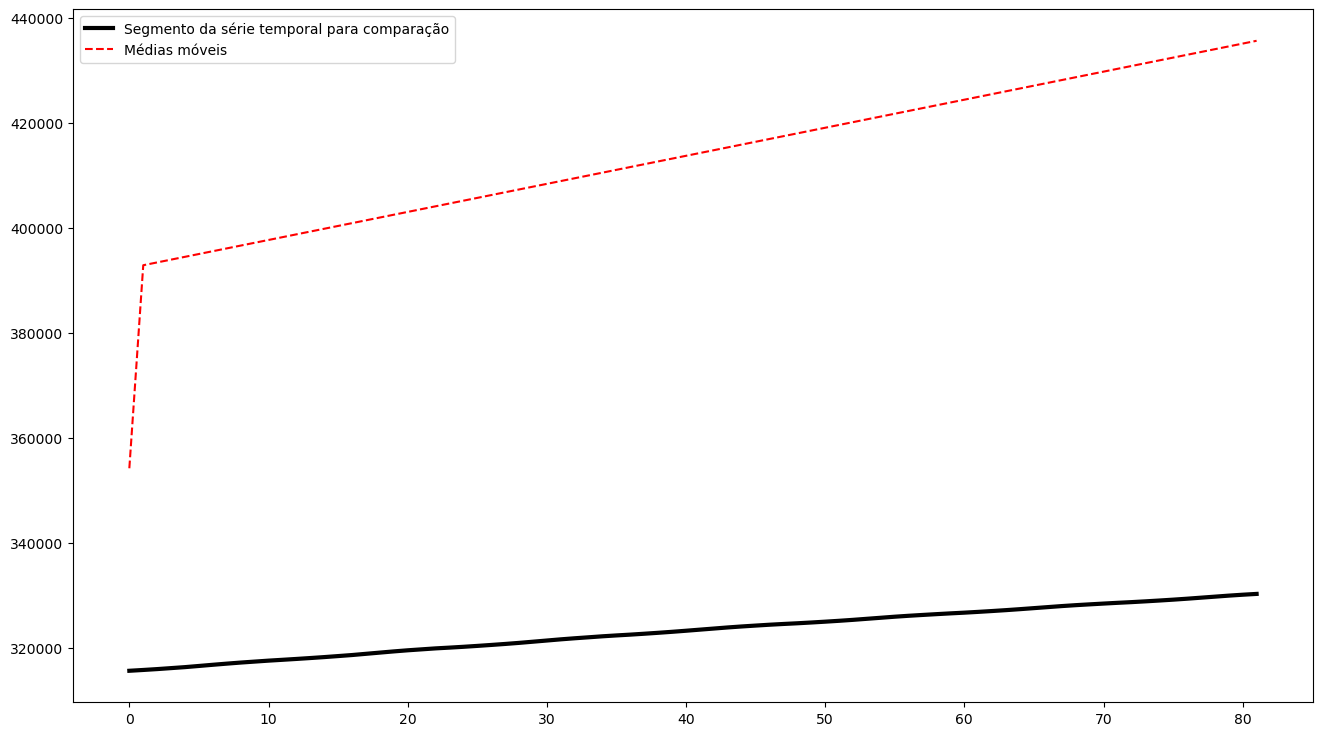

In [13]:
pred_MM = mMM.predict(teste.shape[0])

plt.figure(figsize=(16,9))
plt.plot(teste, color='black', linewidth=3)
plt.plot(pred_MM, color='red', linestyle='dashed')
plt.legend(['Segmento da série temporal para comparação', 'Médias móveis'])

#### Modelo ARIMA

In [14]:
# encontrando os melhores modelos ARIMA
stepwise_fit = pm.auto_arima(treino,max_p=5,max_q=5, trend = 't', seasonal=False)

In [15]:
stepwise_fit.order

(1, 2, 2)

In [16]:
mARIMA = pm.ARIMA(order = stepwise_fit.order, trend = 't').fit(treino)

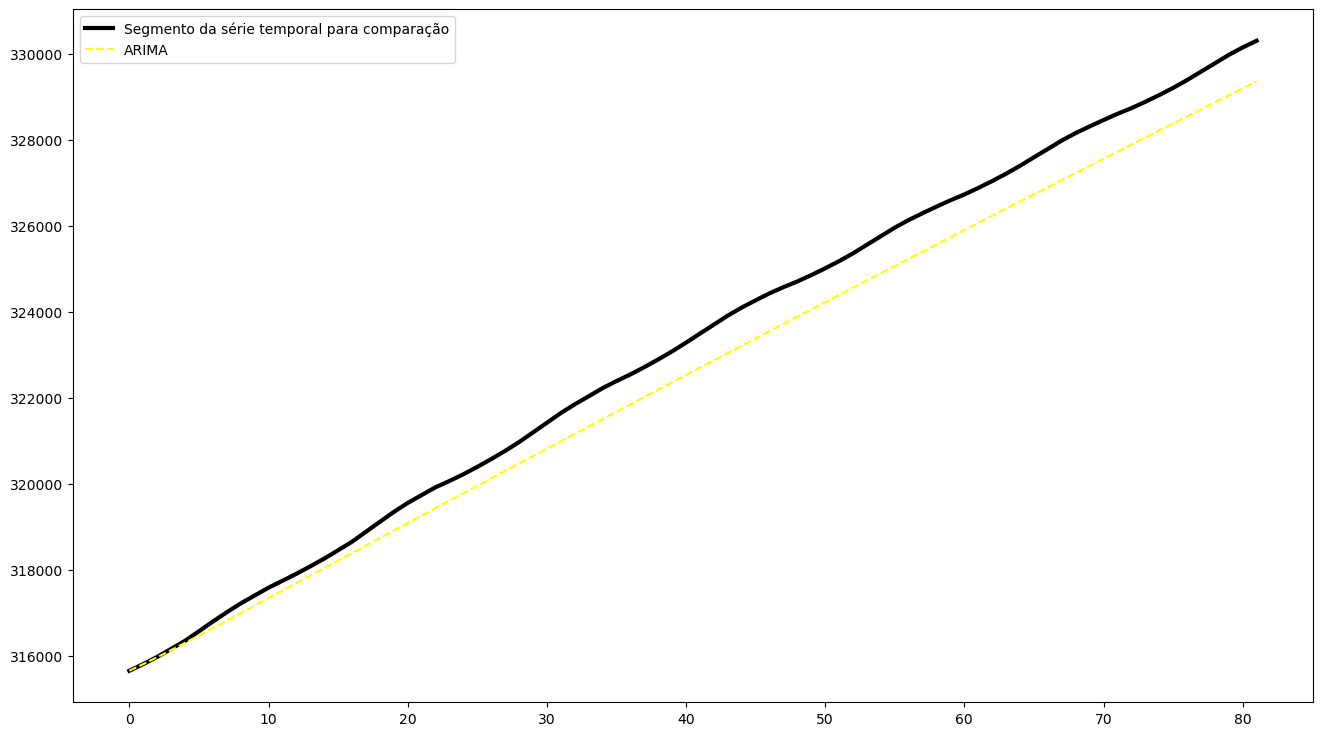

In [17]:
pred_ARIMA = mARIMA.predict(teste.shape[0])

plt.figure(figsize=(16,9))
plt.plot(teste, color='black', linewidth=3)
plt.plot(pred_ARIMA, color='yellow', linestyle='dashed')
plt.legend(['Segmento da série temporal para comparação', 'ARIMA'])

### Comparação entre os modelos

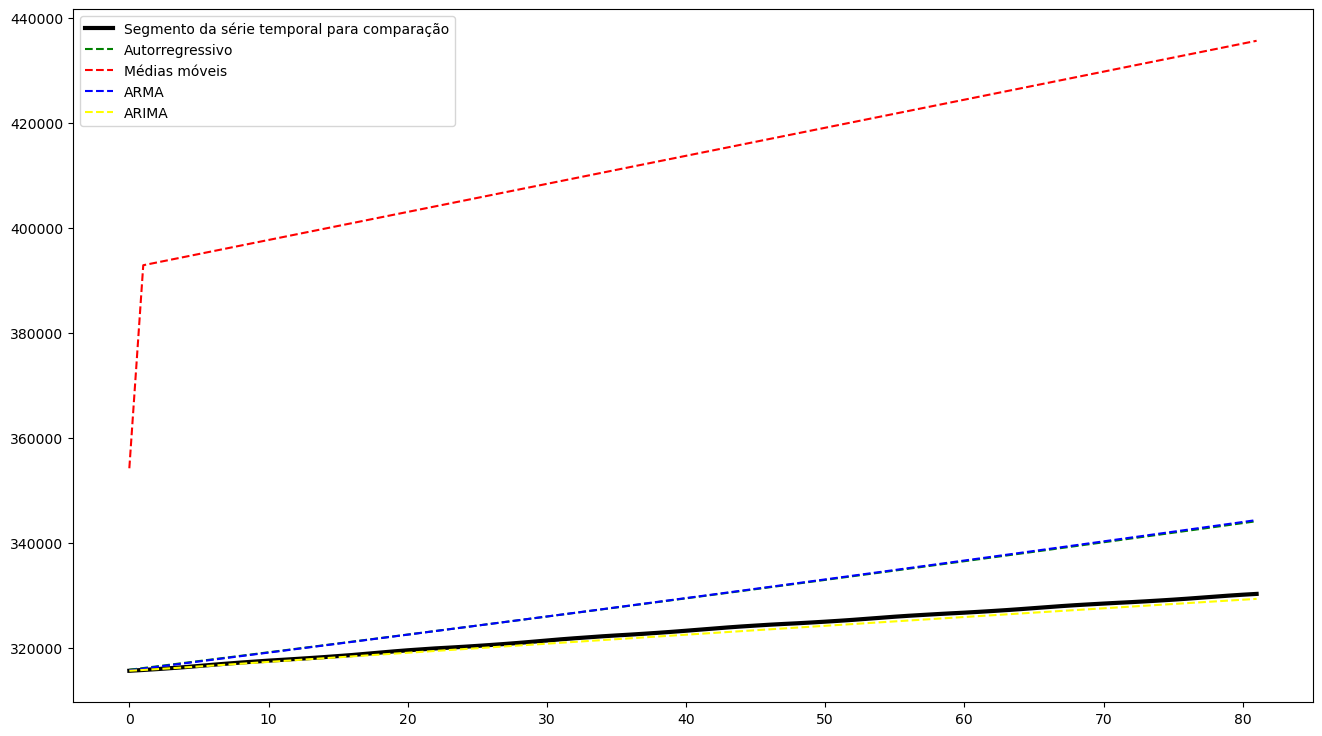

In [18]:
plt.figure(figsize=(16,9))
plt.plot(teste, color='black', linewidth=3)
plt.plot(pred_AR, color='green', linestyle='dashed')
plt.plot(pred_MM, color='red', linestyle='dashed')
plt.plot(pred_ARMA, color='blue', linestyle='dashed')
plt.plot(pred_ARIMA, color='yellow', linestyle='dashed')

plt.legend(['Segmento da série temporal para comparação', 'Autorregressivo', 'Médias móveis', 'ARMA', 'ARIMA'])

## Avaliação dos modelos

In [19]:
print('MSE para AR: %.3f' % mean_squared_error(teste, pred_AR))
print('MSE para MM: %.3f' % mean_squared_error(teste, pred_MM))
print('MSE para ARMA: %.3f' % mean_squared_error(teste, pred_ARMA))
print('MSE para ARIMA: %.3f' % mean_squared_error(teste, pred_ARIMA))

MSE para AR: 59028915.964
MSE para MM: 8270863024.317
MSE para ARMA: 60512846.995
MSE para ARIMA: 475563.553


In [20]:
print('RMSE para AR: %.3f' % np.sqrt(mean_squared_error(teste, pred_AR)))
print('RMSE para MM: %.3f' % np.sqrt(mean_squared_error(teste, pred_MM)))
print('RMSE para ARMA: %.3f' % np.sqrt(mean_squared_error(teste, pred_ARMA)))
print('RMSE para ARIMA: %.3f' % np.sqrt(mean_squared_error(teste, pred_ARIMA)))

RMSE para AR: 7683.028
RMSE para MM: 90944.285
RMSE para ARMA: 7779.000
RMSE para ARIMA: 689.611


In [21]:
print('MAE para AR: %.3f' % mean_absolute_error(teste, pred_AR))
print('MAE para MM: %.3f' % mean_absolute_error(teste, pred_MM))
print('MAE para ARMA: %.3f' % mean_absolute_error(teste, pred_ARMA))
print('MAE para ARIMA: %.3f' % mean_absolute_error(teste, pred_ARIMA))

MAE para AR: 6562.659
MAE para MM: 90389.045
MAE para ARMA: 6619.132
MAE para ARIMA: 626.745


## Validação cruzada no modelo ARIMA

No experimento anterior, algo que pode ser observado é que os valores de desempenho são muito altos, isso ocorre porque estamos lidando com valores altos (quantidade de população).

Uma forma para amenizar essas taxas é por meio do pré-processamento da série temporal. Uma opção seria a mudança da escala dos valores: como todos os valores da série temporal são acima de 1000, no próximo experimento, podemos fazer a divisão dos valores por 1000

#### Obter a série temporal completa no formato ndarray

In [22]:
min(st['value'])

156309.0

In [23]:
max(st['value'])

330309.946

In [24]:
stA = np.asarray(st['value']) / 1000

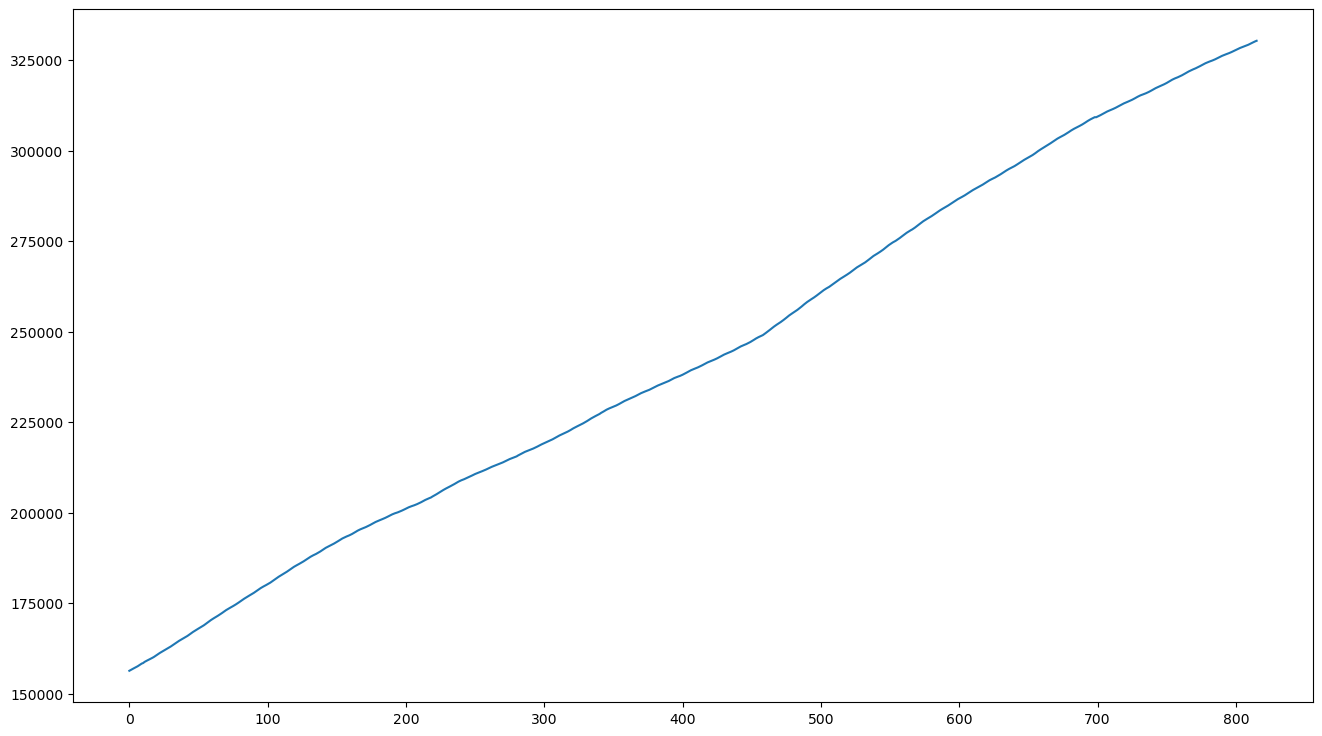

In [25]:
plt.figure(figsize=(16,9))
plt.plot(st['value'])
plt.show()

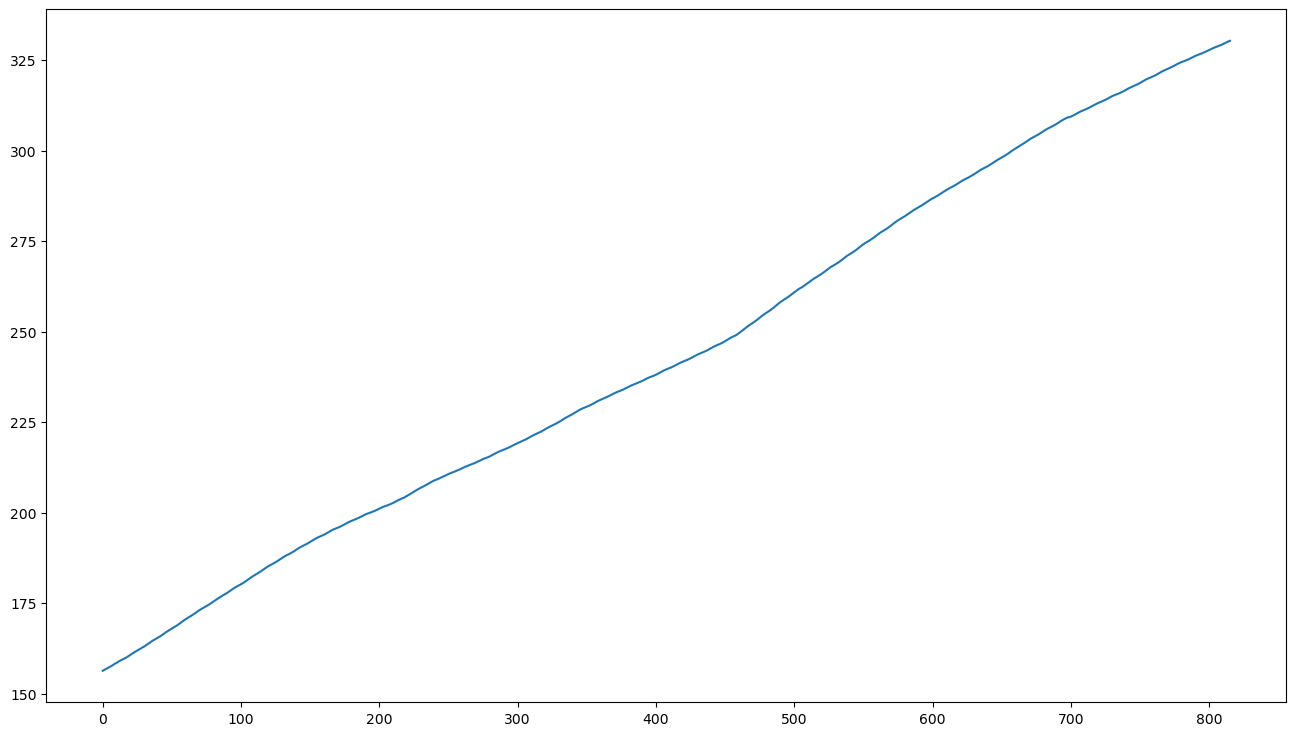

In [26]:
plt.figure(figsize=(16,9))
plt.plot(stA)
plt.show()

#### Aplicação da validação cruzada de 10 folds para dados sequenciais

In [27]:
tss = TimeSeriesSplit(n_splits = 10)
mse = []
rmse = []
mae = []

In [28]:
for i_treino, i_teste in tss.split(stA):
    treinoCV = stA[i_treino]
    testeCV = stA[i_teste]
    
    modelo = pm.ARIMA(order = stepwise_fit.order, trend = 't').fit(treinoCV)
    pred = modelo.predict(testeCV.shape[0])
    
    mae.append(mean_absolute_error(testeCV, pred))
    rmse.append(np.sqrt(mae[-1]))
    mse.append(mean_squared_error(testeCV, pred))

D:\Workspace\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [29]:
print('MSE: %.3f' % np.mean(mse))

MSE: 6.373


In [30]:
print('RMSE: %.3f' % np.mean(rmse))

RMSE: 1.198


In [31]:
print('MAE: %.3f' % np.mean(mae))

MAE: 1.655


## Tarefa 3 - Sales of shampoo over a three year period

In [64]:
st = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv')
st.head()

,Month,Sales of shampoo over a three year period
0,1-Jan,266.0
1,1-Feb,145.9
2,1-Mar,183.1
3,1-Apr,119.3
4,1-May,180.3


In [58]:
s1 = np.asarray(st['Sales of shampoo over a three year period'])
s1

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6, 264.5, 342.3, 339.7, 440.4, 315.9,
       439.3, 401.3, 437.4, 575.5, 407.6, 682. , 475.3, 581.3, 646.9])

In [60]:
tam = int(0.9 * len(s1))
treino = s1[0 : tam]
teste = s1[tam : ]

In [97]:
tss = TimeSeriesSplit(n_splits = 5)
mse = []
rmse = []
mae = []
mape = []

In [105]:
warnings.simplefilter('ignore', ConvergenceWarning)

for i_treino, i_teste in tss.split(s1):
    treinoCV = s1[i_treino]
    testeCV = s1[i_teste]
    
    modelo = pm.ARIMA(order = stepwise_fit.order, trend = 't').fit(treinoCV)
    pred = modelo.predict(testeCV.shape[0])
    
    mae.append(mean_absolute_error(testeCV, pred))
    rmse.append(np.sqrt(mae[-1]))
    mse.append(mean_squared_error(testeCV, pred))
    mape.append(mean_absolute_percentage_error(testeCV, pred))

In [106]:
print('MSE: %.3f' % np.mean(mse))

MSE: 1592311.460


In [107]:
print('RMSE: %.3f' % np.mean(rmse))

RMSE: 18.731


In [108]:
print('MAE: %.3f' % np.mean(mae))

MAE: 598.037


In [109]:
print('MAPE: %.3f' % np.mean(mape))

MAPE: 2.634
